# Obtener los datos

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
def obtener_datos():
# url del archivo csv en la web
  url="https://raw.githubusercontent.com/ageron/data/main/housing/housing.csv"

# Leer el archivo CSV directamente desde la URL
  df = pd.read_csv(url)
  return df

In [74]:
df = obtener_datos()

# Hechar un vistazo

In [75]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [77]:
# verificando si ocean_proximity es categórica
df.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [78]:
def imprimir_estidisticos():
  estad = df.describe().T
  estad["std/mean"] = (estad["std"]/ estad["mean"]) * 100
  estad["std/mean"] = estad["std/mean"].abs()
  estad = estad.round(2)
  return estad

In [79]:
# Resumen de cada variables
imprimir_estidisticos()

,count,mean,std,min,25%,50%,75%,max,std/mean
longitude,20640.0,-119.57,2.00,-124.35,-121.80,-118.49,-118.01,-114.31,1.68
latitude,20640.0,35.63,2.14,32.54,33.93,34.26,37.71,41.95,5.99
housing_median_age,20640.0,28.64,12.59,1.00,18.00,29.00,37.00,52.00,43.94
total_rooms,20640.0,2635.76,2181.62,2.00,1447.75,2127.00,3148.00,39320.00,82.77
total_bedrooms,20433.0,537.87,421.39,1.00,296.00,435.00,647.00,6445.00,78.34
population,20640.0,1425.48,1132.46,3.00,787.00,1166.00,1725.00,35682.00,79.44
households,20640.0,499.54,382.33,1.00,280.00,409.00,605.00,6082.00,76.54
median_income,20640.0,3.87,1.90,0.50,2.56,3.53,4.74,15.00,49.08
median_house_value,20640.0,206855.82,115395.62,14999.00,119600.00,179700.00,264725.00,500001.00,55.79


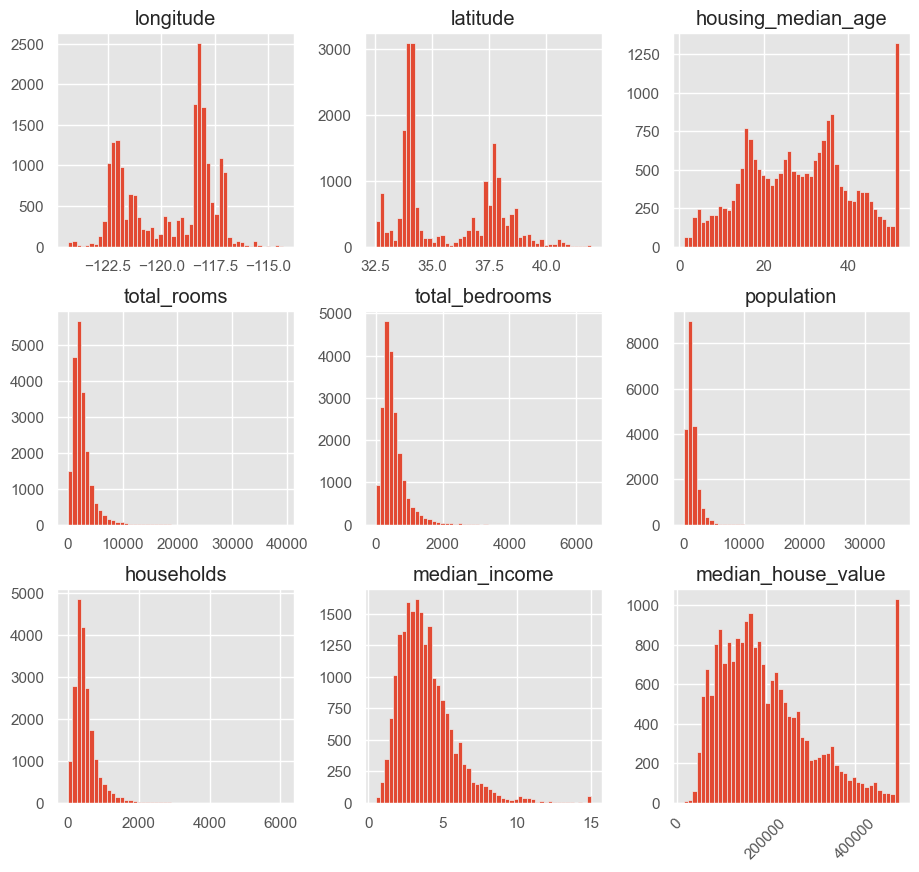

In [80]:
# Observa la forma de las distribuciones
plt.style.use("ggplot")
fig,ax = plt.subplots(3,3,figsize=(11,10))
df.hist(ax=ax,bins=50)
ax[2,2].tick_params(axis='x',rotation=45)
plt.show()



In [81]:
columns_asim_der = ['total_rooms', 'total_bedrooms', 'population', 'households', 'median_income','median_income' ]

In [82]:
#'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value' 
# estas columnas presenta una distribución sesgada a la derecha (Asimétrica Positiva). 
# Además, 'Housing Media age' y 'Median house value' tienen limitaciones por la derecha en el eje X,
# 'Housing Media age es multimodal. Por último, las variables presenten escalas muy diferentes

# Set de Testeo y Entrenamiento

In [83]:
# Para que los sets sean muestras representativas, se realizará un muestreo aleatoria y estratificado, por la variable 'median_income'
# que es la variable que a priori se cosidera que mejor explica 'median_house_value' 

In [84]:
df["income_cat"] = pd.cut(df['median_income'],bins=[0, 1.5, 3, 4.5, 6, np.inf], labels = np.arange(1,6))

In [85]:
(df.income_cat.value_counts()/df.shape[0])*100

income_cat
3    35.058140
2    31.884690
4    17.630814
5    11.443798
1     3.982558
Name: count, dtype: float64

<Axes: xlabel='income_cat'>

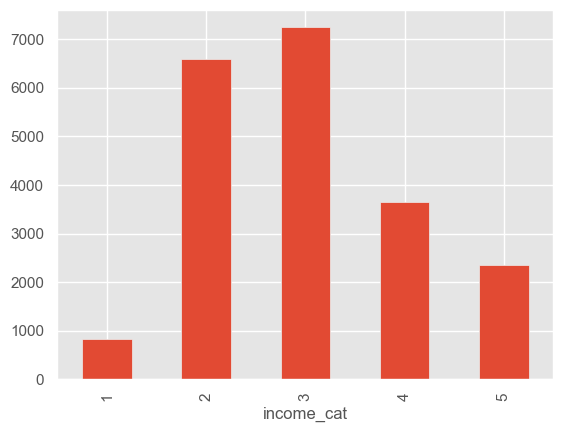

In [86]:
df.income_cat.value_counts().sort_index().plot.bar()

In [87]:
# Se separan los sets
from sklearn.model_selection import train_test_split

set_train,set_test = train_test_split(df,
                                      test_size=.2,
                                      random_state=42,
                                      shuffle=True,
                                      stratify=df['income_cat'])

In [88]:
# Se verifica que las proporciones se mantienen
df_income_cats = pd.DataFrame()
df_income_cats["Train"]= set_train['income_cat'].value_counts()/set_train['income_cat'].count()
df_income_cats["Test"] = set_test["income_cat"].value_counts() /set_test["income_cat"].count()
df_income_cats["Original"] = df["income_cat"].value_counts() / df["income_cat"].count()

In [89]:
df_income_cats

,Train,Test,Original
income_cat,,,
3,0.350594,0.350533,0.350581
2,0.318859,0.318798,0.318847
4,0.176296,0.176357,0.176308
5,0.114462,0.114341,0.114438
1,0.039789,0.039971,0.039826


# Exploración de Datos

<Axes: xlabel='longitude', ylabel='latitude'>

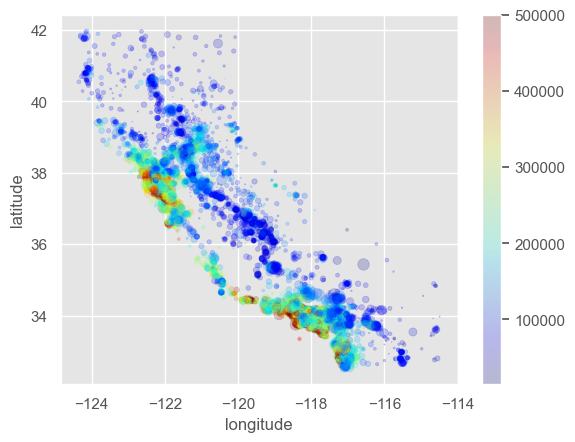

In [90]:
# Graficamos los datos geográficos

df_train = set_train.copy()
df_train.plot(kind="scatter",y="latitude",x="longitude",alpha=.2,grid=True,
              s=df_train["population"]/100,
              c=df_train["median_house_value"],colorbar=True,legend=True,cmap='jet')

#cerca de la costa es donde la casa es más valisa, salvo por el norte y el centro 

In [91]:
# Las variables más prometedoras son 'median_income', 'total_rooms', 'housing_median_age','latitude'
correlaciones = df_train.corr(numeric_only=True)
corr_precio = correlaciones["median_house_value"]
print(corr_precio.sort_values(ascending=False))

median_house_value    1.000000
median_income         0.688380
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
longitude            -0.050859
latitude             -0.139584
Name: median_house_value, dtype: float64


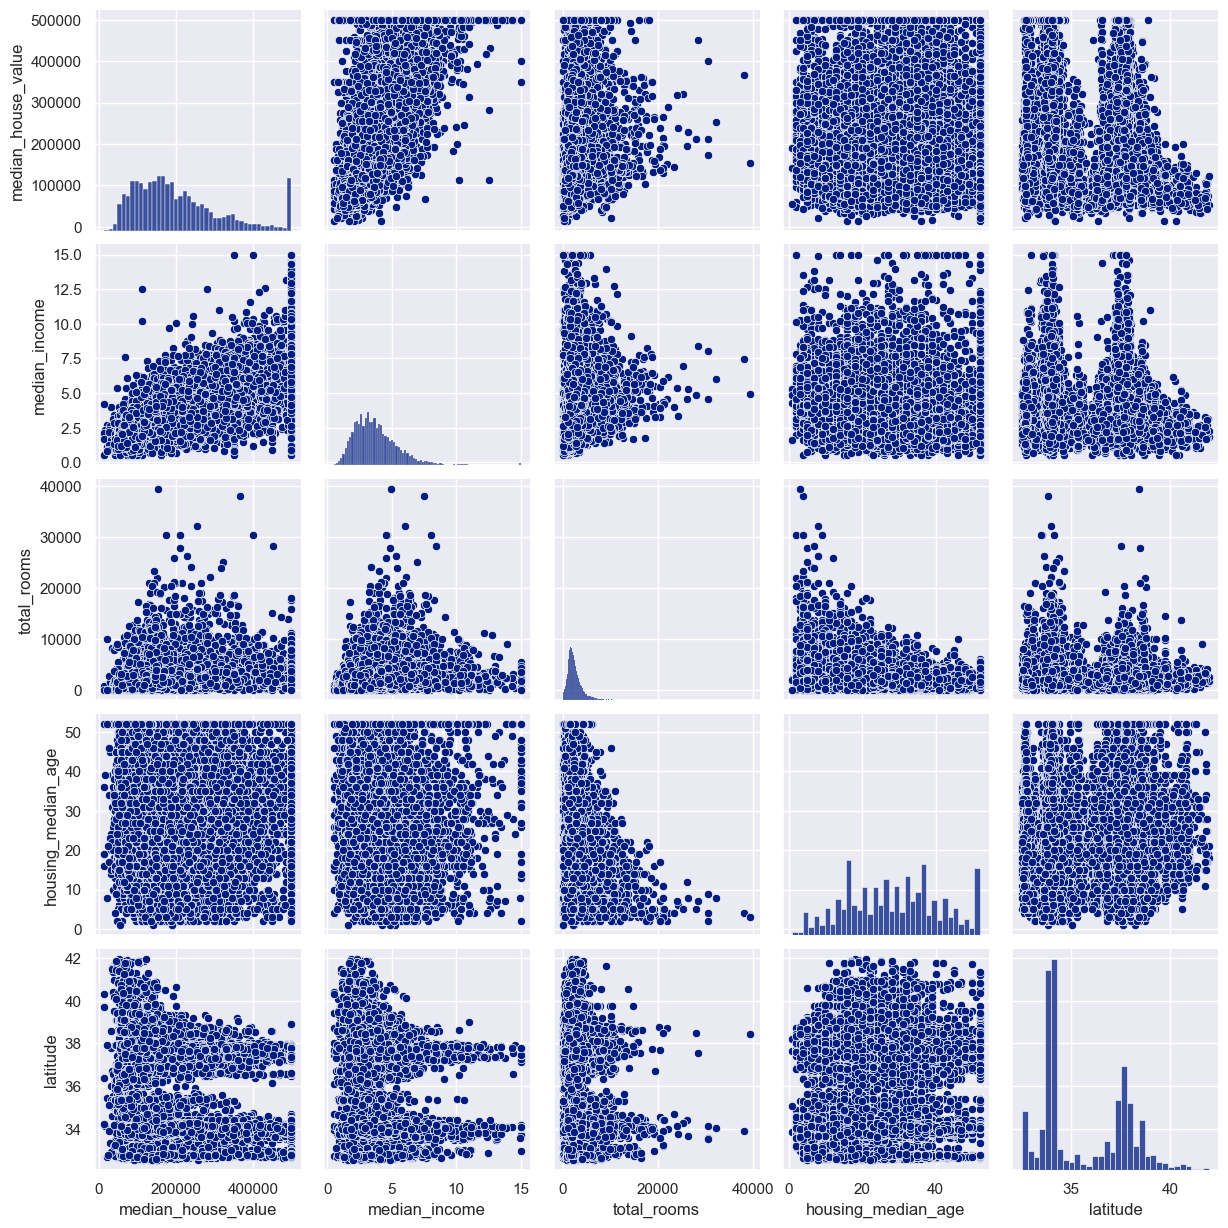

In [92]:
df_grafico =df_train[["median_house_value","median_income","total_rooms","housing_median_age","latitude"]]
sns.set(style="darkgrid",palette="dark")
sns.pairplot(data=df_grafico)
plt.show()

In [93]:
# Crear variables
df_train["rooms_per_house"] = df_train["total_rooms"] / df_train["households"]
df_train["bedrooms_ratio"] = df_train["total_bedrooms"] / df_train["total_rooms"]
df_train["people_per_house"] = df_train["population"] / df_train["households"]


# Ver su Correlación
df_corr = df_train.corr(numeric_only=True)["median_house_value"]
print(df_corr.sort_values(ascending=False))

median_house_value    1.000000
median_income         0.688380
rooms_per_house       0.143663
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
people_per_house     -0.038224
longitude            -0.050859
latitude             -0.139584
bedrooms_ratio       -0.256397
Name: median_house_value, dtype: float64


In [94]:
new_vars = ["rooms_per_house","bedrooms_ratio","people_per_house"]

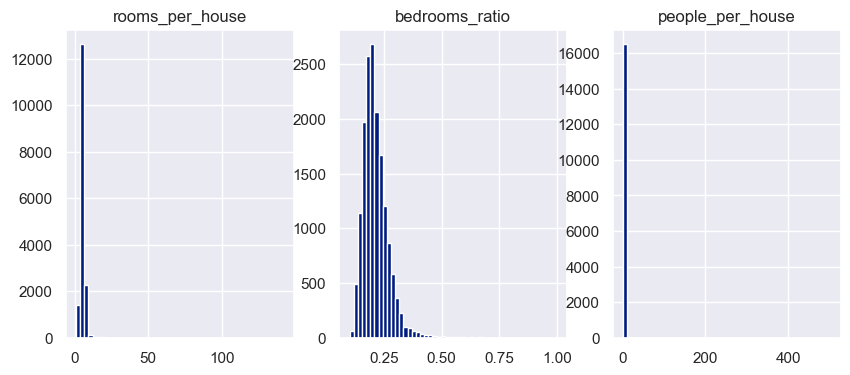

In [95]:
fig,ax = plt.subplots(nrows=1,ncols=3,figsize=(10,4))

for col in range(3):
    ax[col].hist(df_train[new_vars[col]],bins=50)
    ax[col].set_title(new_vars[col])
plt.show()

In [96]:
df_train["people_per_house"].value_counts().count()

np.int64(15274)

# Preparar los Datos para Algoritmos

In [97]:
df_train_x = df_train.drop(columns=["median_house_value","income_cat"])
df_train_y = df_train['median_house_value'].copy()


## Transformacion Logaritmica

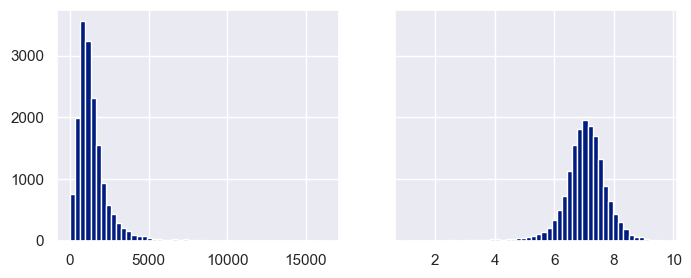

In [98]:
# Aplicar el logaritmo tiende a Normalizar variables con Asimetría Positiva
fig, axs = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
df_train_x["population"].hist(ax=axs[0], bins=50)
df_train_x["population"].apply(np.log).hist(ax=axs[1], bins=50)
plt.show()

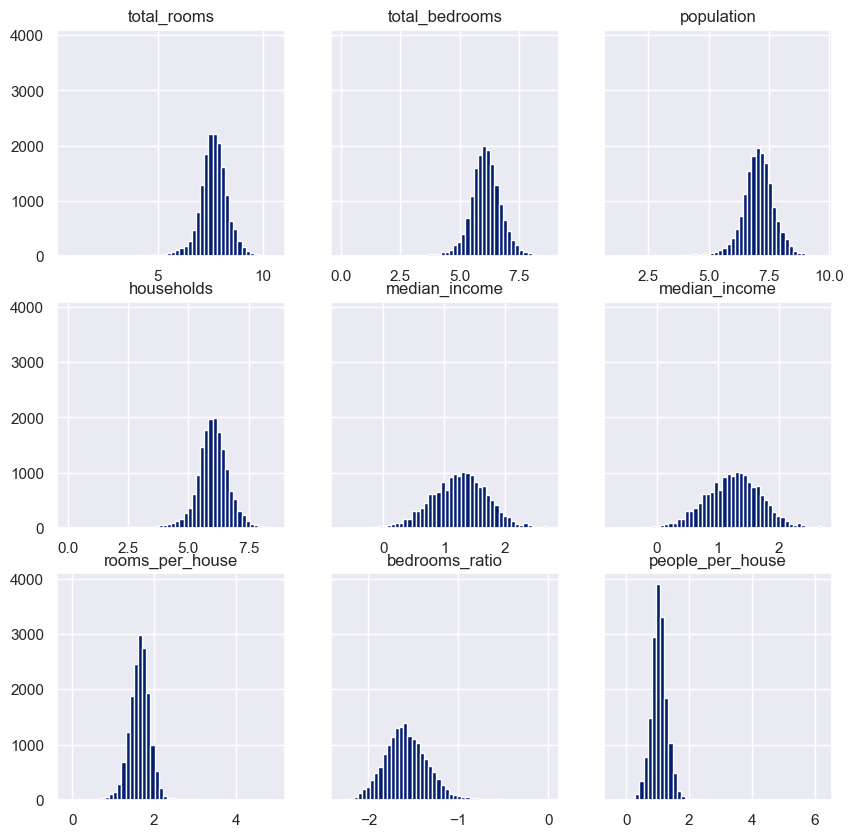

In [99]:
# veamos las demas variables asimetricas positivas
var_asim= columns_asim_der + new_vars
i=0
fig,ax= plt.subplots(3, 3, figsize=(10, 10), sharey=True)
for fila in range(3):
    for col in range(3):
       norm = np.log(df_train_x[var_asim[i]])
       ax[fila,col].hist(norm,bins=50)
       ax[fila,col].set_title(var_asim[i])
       i+=1

plt.show()

## Transformacion por similaridad

In [100]:

from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.cluster import KMeans

class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self,n_clusters=10,gamma=1.0,random_state=None):
        self.n_clusters = n_clusters
        self.gamma=gamma
        self.random_state= random_state

    def fit(self,X,y=None,sample_weight=None):
        self.kmeans_ = KMeans(self.n_clusters,random_state=self.random_state)
        self.kmeans_.fit(X,sample_weight = sample_weight)
        return self

    def transform(self,X):
            return rbf_kernel(X,self.kmeans_.cluster_centers_,gamma=self.gamma) 


    def get_feature_names_out(self,names=None):
         return [f"Cluster{i} similarity" for i in range(self.n_clusters)]
    


In [101]:
"""
Se crea un transformador ClusterSimilarity que  establece 10 grupos.
El transformador utiliza k-medias para localizar los 10 grupos y luego mide la similitud FBR gaussiana 
entre cada distrito y los 10 centros de los grupos
"""
cluster_simil = ClusterSimilarity(random_state=42)
similarities = cluster_simil.fit_transform(df_train_x[['latitude','longitude']],sample_weight=df_train_y)

In [102]:

similarities[:3].round(2)

array([[0.  , 0.98, 0.  , 0.  , 0.  , 0.  , 0.13, 0.55, 0.  , 0.56],
       [0.64, 0.  , 0.11, 0.04, 0.  , 0.  , 0.  , 0.  , 0.99, 0.  ],
       [0.  , 0.65, 0.  , 0.  , 0.01, 0.  , 0.49, 0.59, 0.  , 0.28]])

In [103]:
df_train_x["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     7274
INLAND        5301
NEAR OCEAN    2089
NEAR BAY      1846
ISLAND           2
Name: count, dtype: int64

## Transformación de variable categórica

In [104]:
# Se craean variables ficticas para la variable categorica

from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
cat_colums = cat_encoder.fit_transform(df_train_x[["ocean_proximity"]])

In [105]:
cat_colums.toarray()[:5]

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

## Pipelines

In [106]:
# Para las variables numericas:
#       Se imputará la mediana a los valores faltantes 
#       Serán estandarizadas para que tengan la misma escala


# En algunos casos
#       Se añadirán variables nuevas a partir de otras (ratios)
#       Se cambiará 'longitude' y 'latitude' por un algoritmo de agrupamiento. 
#       Se aplicará logaritmo a variables con distribución asimétrica


# Para las variables categóricas:
#       Se impuatará el valor más frequente a los valores faltantes
#       se crearan variables ficticias para cada valor

         

In [107]:
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,FunctionTransformer
from sklearn.compose import ColumnTransformer, make_column_selector

In [108]:

# Funaciones para crear las variables nuevas( los ratios )

def column_ratio(X):
    return X[:, [0]] / X[:, [1]] # se calcula el ratio, division entre columnas


def ratio_name(function_transformer, feature_names_in):
    return ["ratio"]  # se obtiene el nombre de las características

def ratio_pipeline():  # Funcion que crea la pipeline para calcular cada ratio
    return make_pipeline(
        SimpleImputer(strategy="median"),
        FunctionTransformer(column_ratio, feature_names_out=ratio_name),
        StandardScaler())

# Objeto para el algoritmo de agrupamiento
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)



# Pipeline para reducir la asimetría derecha
log_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(np.log, feature_names_out="one-to-one"),
    StandardScaler())




# Pipeline para imputar la mediana y estandarizar el resto de variables numéricas
default_num_pipeline= make_pipeline(SimpleImputer(strategy='median'),
    StandardScaler()
)



# Pipeline para imputar valor más frecuente y crear variables ficticias
cat_pipeline = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(handle_unknown='ignore')
)

In [109]:
# Se indica a que varibles se aplican las pipelines

preprocessing = ColumnTransformer([
        ("bedrooms", ratio_pipeline(), ["total_bedrooms", "total_rooms"]),
        ("rooms_per_house", ratio_pipeline(), ["total_rooms", "households"]),
        ("people_per_house", ratio_pipeline(), ["population", "households"]),
        ("log", log_pipeline, ["total_bedrooms", "total_rooms", "population",
                               "households", "median_income"]),
        ("geo", cluster_simil, ["latitude", "longitude"]),
        ("cat", cat_pipeline, make_column_selector(dtype_include=object)),
        ("age",default_num_pipeline,['housing_median_age'])
    ],
    )



In [110]:

X = preprocessing.fit_transform(df_train_x)
print(X.shape)


(16512, 24)


In [111]:
preprocessing.get_feature_names_out()

array(['bedrooms__ratio', 'rooms_per_house__ratio',
       'people_per_house__ratio', 'log__total_bedrooms',
       'log__total_rooms', 'log__population', 'log__households',
       'log__median_income', 'geo__Cluster0 similarity',
       'geo__Cluster1 similarity', 'geo__Cluster2 similarity',
       'geo__Cluster3 similarity', 'geo__Cluster4 similarity',
       'geo__Cluster5 similarity', 'geo__Cluster6 similarity',
       'geo__Cluster7 similarity', 'geo__Cluster8 similarity',
       'geo__Cluster9 similarity', 'cat__ocean_proximity_<1H OCEAN',
       'cat__ocean_proximity_INLAND', 'cat__ocean_proximity_ISLAND',
       'cat__ocean_proximity_NEAR BAY', 'cat__ocean_proximity_NEAR OCEAN',
       'age__housing_median_age'], dtype=object)

# Seleccionar Modelo y Entrenarlo

In [112]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import  root_mean_squared_error
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, cross_val_predict


In [113]:
x_train = set_train.drop(columns=['income_cat','median_house_value'])
y_train = set_train['median_house_value']

In [114]:
# Se prueba la Regresion Lineal sin regularizar

lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x0000021241B22CA0>,
                                                                                       func=<function column_ratio at 0x0000021241998E00>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['total_bedr...
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000021255425E50>),
                                                 ('age',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['housing_median_age'])])),
                ('linearregression', LinearRegression())])

In [115]:
# La medida de rendimiento es Raíz del error cuadrático medio
y_pred = lin_reg.predict(x_train)
lin_rmse = root_mean_squared_error(y_train,y_pred)
print(lin_rmse) # es un error muy grande

68972.88910758485


In [116]:
# Se prueba un arbol de decision de con 
tree = make_pipeline(preprocessing,DecisionTreeRegressor(max_depth=5,random_state=42))
tree.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x0000021241B22CA0>,
                                                                                       func=<function column_ratio at 0x0000021241998E00>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['total_bedr...
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000021255425E50>),
                                                 ('age',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['housing_median_age'])])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(max_depth=5, random_state=42))])

In [117]:
y_pred = tree.predict(x_train)

In [118]:
tree_recm= root_mean_squared_error(y_train,y_pred)
print(tree_recm) # mejora muy poco

64098.8557692096


In [119]:
# si se utiliza validación cruzada
forest_reg = make_pipeline(preprocessing, RandomForestRegressor(random_state=42) )



In [120]:
forest_rmses= - cross_val_score(forest_reg,X=x_train, y=y_train,
                               scoring='neg_root_mean_squared_error',
                               cv=5)
pd.Series(forest_rmses).describe()

count        5.000000
mean     47224.042013
std        608.601023
min      46441.464903
25%      47084.234264
50%      47193.006943
75%      47256.826463
max      48144.677492
dtype: float64

In [121]:
# Busqueda Aleatoria

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

full_pipeline = Pipeline([
    ('preprocessing',preprocessing),
    ('random_forest',RandomForestRegressor(random_state=42))
])
param_distribs = {'preprocessing__geo__n_clusters': randint(low=3, high=50),
                  'random_forest__max_features': randint(low=2, high=20)}

rnd_search = RandomizedSearchCV(
    full_pipeline, param_distributions=param_distribs, n_iter=10, cv=3,
    scoring='neg_root_mean_squared_error', random_state=42)

rnd_search.fit(x_train,y_train)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(transformers=[('bedrooms',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('functiontransformer',
                                                                                                FunctionTransformer(feature_names_out=<function ratio_name at 0x0000021241B22CA0>,
                                                                                                                    func=<function column_ratio at 0x0000021241998E00>)),
                                                                                               ('standardscaler',
                                                                                                St...
                                             ('random_forest',
                                              RandomForestRegressor(random_state=42))]),
                   param_distributions={'preprocessing__geo__n_clusters': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000021255668610>,
                                        'random_forest__max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002124078D1D0>},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [122]:
y_pred = rnd_search.predict(x_train)

In [123]:
rnd_search_rmse = root_mean_squared_error(y_train,y_pred)
print(rnd_search_rmse)

15226.91355944401


In [124]:
from sklearn.svm import LinearSVR

svm_reg = make_pipeline(preprocessing,LinearSVR(epsilon=0.5,random_state=42))
svm_reg.fit(x_train,y_train)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x0000021241B22CA0>,
                                                                                       func=<function column_ratio at 0x0000021241998E00>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['total_bedr...
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000021255425E50>),
                                                 ('age',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['housing_median_age'])])),
                ('linearsvr', LinearSVR(epsilon=0.5, random_state=42))])

In [125]:
y_pred = svm_reg.predict(x_train)
svm_reg_rmse = root_mean_squared_error(y_true=y_train,y_pred=y_pred)
print(svm_reg_rmse) # Es el mejor encontrado

212746.0777959128


In [126]:
svm_reg_rmses = - cross_val_score(svm_reg,X=x_train,y=y_train,cv=5)
print(pd.Series(svm_reg_rmses).describe())

count    5.000000
mean     2.554669
std      0.096484
min      2.412420
25%      2.503967
50%      2.583387
75%      2.629025
max      2.644547
dtype: float64


# Probando mejor estimador

In [127]:
x_test = set_test.drop(columns=['median_house_value','income_cat'])
y_test = set_test['median_house_value']

In [128]:
prediccion_final = svm_reg.predict(x_test)
final_rmse = root_mean_squared_error(y_true=y_test,y_pred=prediccion_final)
print(final_rmse)

215102.6566574614


In [129]:
#intervalo de confianza 
from scipy import stats 
confianza =.95
residuo_cuadrado = (prediccion_final - y_test)**2
intervalo =np.sqrt(stats.t.interval(confidence=confianza, df =len(residuo_cuadrado)-1,
                         loc=residuo_cuadrado.mean(),
                         scale=stats.sem(residuo_cuadrado)))

In [130]:
print(intervalo)

[211044.54972527 219085.6084581 ]
